# Earthquake Analysis
The National Earthquake Information Center (NEIC) determines the location and size of all significant earthquakes that occur worldwide and disseminates this information immediately to national and international agencies, scientists, critical facilities, and the general public. The NEIC compiles and provides to scientists and to the public an extensive seismic database that serves as a foundation for scientific research through the operation of modern digital national and global seismograph networks and cooperative international agreements. The NEIC is the national data center and archive for earthquake information. This dataset includes a record of the 
- date
- time
- location
- depth
- magnitude
- and source of every earthquake

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('database.csv')

In [4]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [5]:
df.shape

(23412, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [7]:
#  Checking fr null values

df.isna().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [8]:
# The following columns are not useful in the analysis due to their huge number 
# of null values. They will be dropped from the dataset

df.drop(columns= ['Depth Error', 'Depth Seismic Stations', 
                  'Magnitude Error', 'Magnitude Seismic Stations', 
                  'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error'], inplace= True)

In [9]:
# Filling other null values

df['Magnitude Type'].fillna('Unknown', inplace= True)
df['Root Mean Square'].fillna(df['Root Mean Square'].mean(), inplace= True)

In [10]:
df.isna().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      0
Root Mean Square    0
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

Inspecting the `Type` column

In [11]:
df.Type.value_counts()

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

In [12]:
# Dropping records that are not earthquakes since those 
# are not our focus in this analysis

indices = df[df.Type != 'Earthquake'].index
df.drop(indices, inplace= True)

In [13]:
# Checking for duplicates

df.duplicated().sum()

0

In [14]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


Converting to date and time columns to datetime

In [15]:
# Inspecting Date column for unsual data that could 
# impede the conversion to datetime data type

df.Date.str.len().value_counts()

10    23229
24        3
Name: Date, dtype: int64

There are three records that do not follow the format

In [16]:
err = df[df.Date.str.len() != 10]
err

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,5.6,MB,1.022784,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,5.6,MW,1.300000,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,5.8,MWC,1.060000,USP000HWQP,US,US,GCMT,Reviewed


For the Date column, we'll slice the text up to the 10th character

For the Time column, we'll slice the text from the 12th character up to the 19th character

In [17]:
df.loc[err.index, 'Date'] = df.loc[err.index, 'Date'].str[:10]
df.loc[err.index, 'Time'] = df.loc[err.index, 'Time'].str[11:19]

In [18]:
# Confirming correction

df.iloc[err.index, :]

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3397,03/13/1975,18:45:29,-21.778,170.526,Earthquake,85.0,6.1,MB,1.022784,USP0000A7G,US,US,US,Reviewed
7644,08/08/1985,22:26:17,-61.880,151.940,Earthquake,10.0,5.6,MWC,1.022784,GCMTB080885B,GCMT,GCMT,GCMT,Automatic
20830,06/19/2011,00:20:04,-5.963,-80.976,Earthquake,10.0,5.5,MWB,1.230000,USP000J3DG,US,US,US,Reviewed


In [19]:
# Merging Date and Time into a single column 'timestamp' and converting to datetime

df = df.assign(timestamp = lambda x: df.Date + ' ' + df.Time)
df['Date'] = pd.to_datetime(df.timestamp)

In [20]:
df.dtypes

Date                datetime64[ns]
Time                        object
Latitude                   float64
Longitude                  float64
Type                        object
Depth                      float64
Magnitude                  float64
Magnitude Type              object
Root Mean Square           float64
ID                          object
Source                      object
Location Source             object
Magnitude Source            object
Status                      object
timestamp                   object
dtype: object

In [21]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,timestamp
0,1965-01-02 13:44:18,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,01/02/1965 13:44:18
1,1965-01-04 11:29:49,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,01/04/1965 11:29:49
2,1965-01-05 18:05:58,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,01/05/1965 18:05:58
3,1965-01-08 18:49:43,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,01/08/1965 18:49:43
4,1965-01-09 13:32:50,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,01/09/1965 13:32:50


We wont be focusing on time of the day in this analysis. So "Time" column will be dropped. Timestamp column is no longer needed

In [22]:
# The following columns are not relevant in the analysis. They will be dropped

df.drop(columns= ['ID', 'Source', 'Location Source', 'Magnitude Source', 
                  'Type', 'Time', 'timestamp', 'Root Mean Square', 'Status'], inplace= True)

In [23]:
df.set_index('Date', inplace= True)

In [24]:
df.head()

,Latitude,Longitude,Depth,Magnitude,Magnitude Type
Date,,,,,
1965-01-02 13:44:18,19.246,145.616,131.6,6.0,MW
1965-01-04 11:29:49,1.863,127.352,80.0,5.8,MW
1965-01-05 18:05:58,-20.579,-173.972,20.0,6.2,MW
1965-01-08 18:49:43,-59.076,-23.557,15.0,5.8,MW
1965-01-09 13:32:50,11.938,126.427,15.0,5.8,MW


## Exploratory Data Analysis (EDA)

### Univariate Analysis

Exploring locations

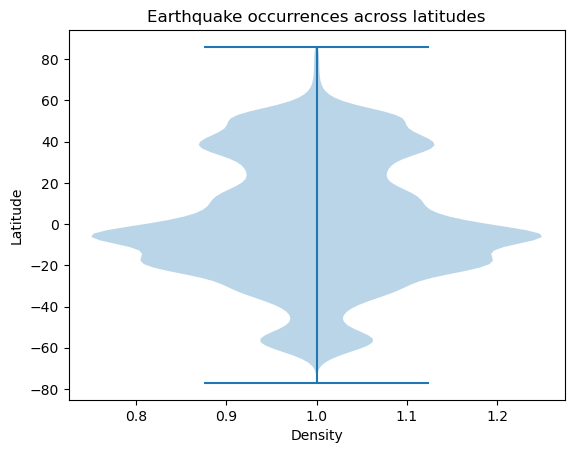

In [25]:
plt.violinplot(df['Latitude'])
plt.xlabel('Density')
plt.ylabel('Latitude')
plt.title('Earthquake occurrences across latitudes');

We have more earthquakes around the equator and the number of occurrences decreases towards the poles. There is surge at around 40 degrees North as well as around 60 degrees South

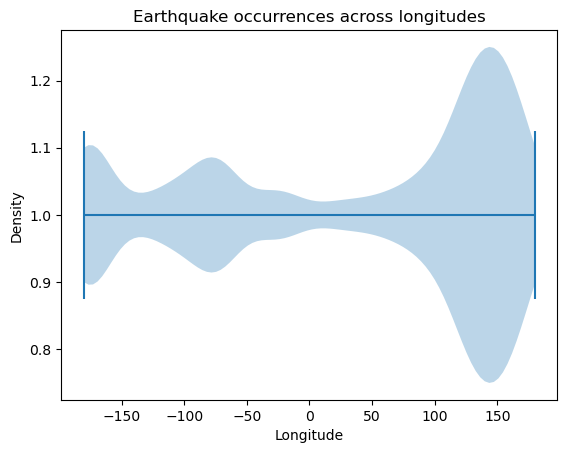

In [26]:
plt.violinplot(df['Longitude'], vert=False)
plt.xlabel('Longitude')
plt.ylabel('Density')
plt.title('Earthquake occurrences across longitudes');

The eastern hemisphere recorded a great deal of earthquakes compared to the western hemisphere

Let's make a heatmap of different locations 

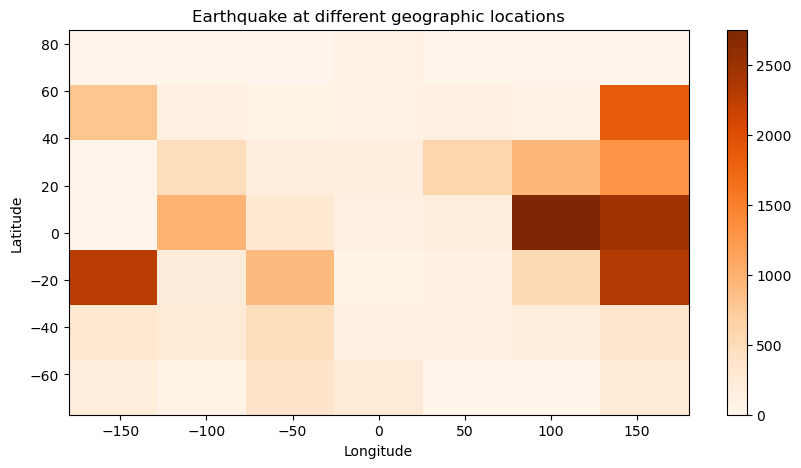

In [27]:
plt.figure(figsize= (10,5))
plt.hist2d(x= 'Longitude', y= 'Latitude', data= df, 
           bins= 7, 
           cmap= 'Oranges')
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earthquake at different geographic locations');

This heatmap visualises the geographic locations with the most occurrences of earthquakes present in the eastern hemisphere close to the equator. 

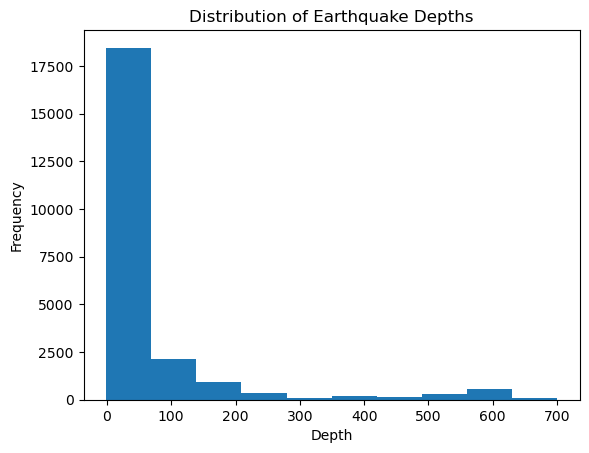

In [28]:
plt.hist(df.Depth)
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.title('Distribution of Earthquake Depths');

Most earthquakes are less than 100 kilometres (Shallow earthquakes). Earthquakes are divide into three based on their depths surface
- Shallow earthquakes - 0 to 70 km deep
- intermediate earthquakes - 70 to 300 km deep
- deep earthquakes 300 to 700 km deep

In [29]:
# Making a count of each type of earthquake

bins = [0, 70, 300, 700]
labels = ['Shallow', 'Intermediate', 'Deep']
pd.cut(df.Depth, bins, labels= labels).value_counts()

Shallow         18508
Intermediate     3391
Deep             1326
Name: Depth, dtype: int64

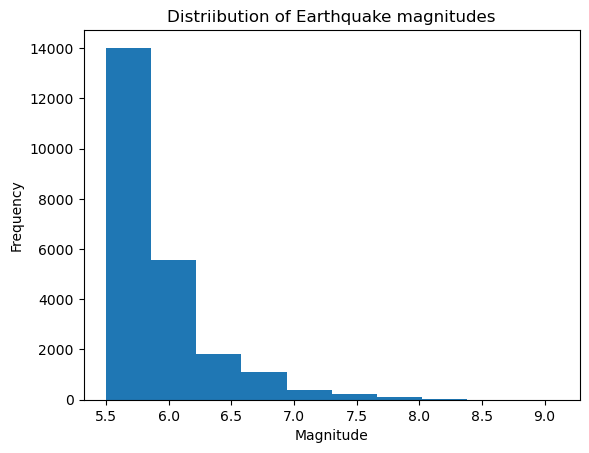

In [30]:
plt.hist(df.Magnitude)
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Distriibution of Earthquake magnitudes');

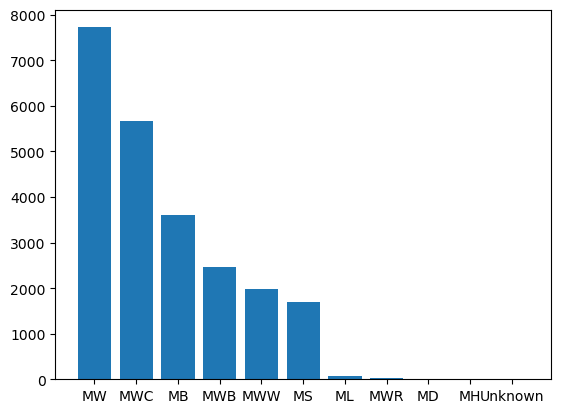

In [31]:
data= df['Magnitude Type'].value_counts()
plt.bar(data.index, data);

### Bivariate Analysis

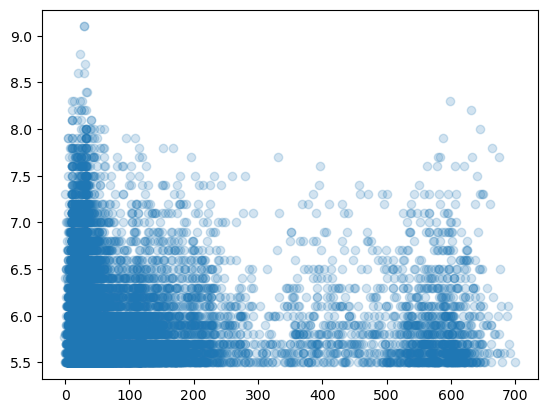

In [32]:
plt.scatter(data= df, x= 'Depth', y= 'Magnitude', alpha= 0.2)

It appears there are no correlations between the depth and the magnitude

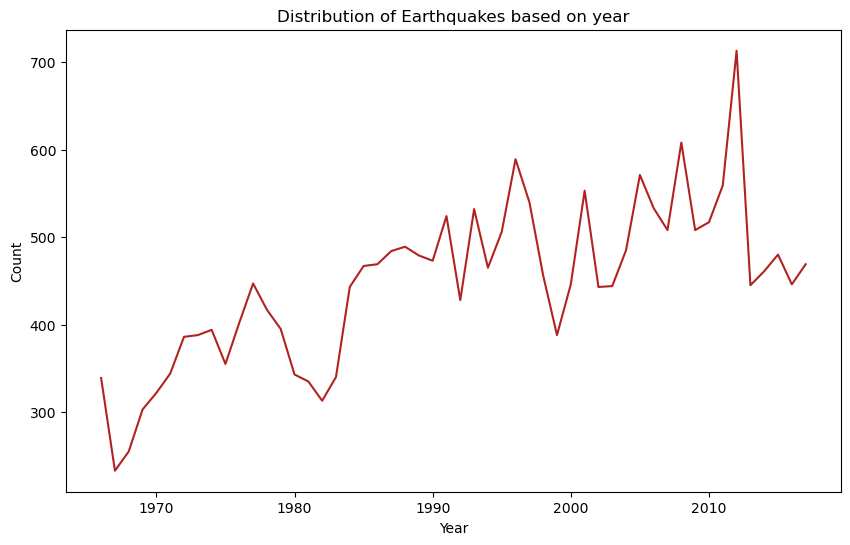

In [33]:
plt.figure(figsize= (10,6))
data = df.resample('Y').count()
sns.lineplot(x= data.index, y= data.Latitude, color= 'firebrick', markers= 'x')
plt.title('Distribution of Earthquakes based on year')
plt.xlabel('Year')
plt.ylabel('Count');

## Clustering

#### K-Means Clustering

In [34]:
dfk = df.copy()

In [35]:
# Encoding categorical columns

dfk['Magnitude Type'], _ = pd.factorize(dfk['Magnitude Type'])

In [36]:
dfk.head()

,Latitude,Longitude,Depth,Magnitude,Magnitude Type
Date,,,,,
1965-01-02 13:44:18,19.246,145.616,131.6,6.0,0
1965-01-04 11:29:49,1.863,127.352,80.0,5.8,0
1965-01-05 18:05:58,-20.579,-173.972,20.0,6.2,0
1965-01-08 18:49:43,-59.076,-23.557,15.0,5.8,0
1965-01-09 13:32:50,11.938,126.427,15.0,5.8,0


In [37]:
from sklearn.cluster import KMeans

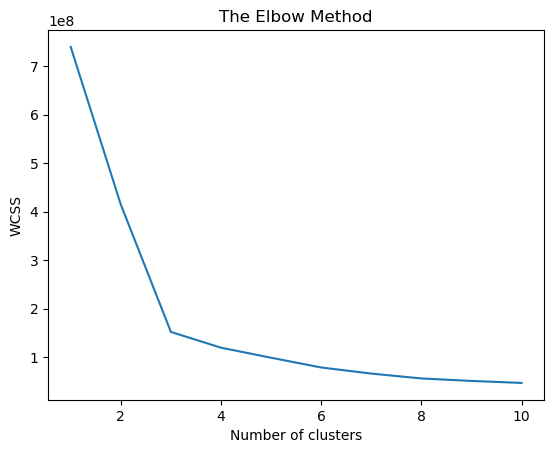

In [38]:
# Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dfk)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number of clusters is 3

In [39]:
# Fitting the clustering model with 3 clusters

kmns = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmns.fit(dfk)

KMeans(n_clusters=3, random_state=42)

In [40]:
# The centroid of each cluster

cents = kmns.cluster_centers_
cents

array([[   7.78412611,  130.15833789,   44.71549921,    5.8886511 ,
           3.66630638],
       [  -8.31063417, -108.39325362,   42.09403236,    5.86390044,
           3.72781581],
       [  -6.85649545,   -9.11100538,  529.17178923,    5.93570887,
           3.70811221]])

Visualising the clusters with three variables at a time

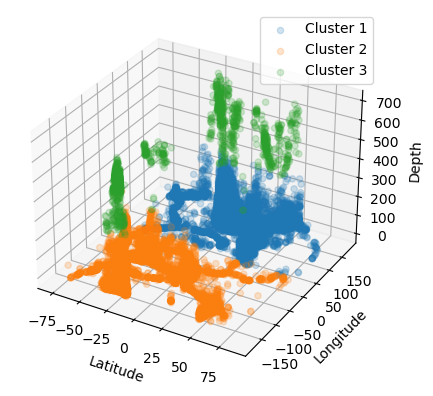

In [41]:
fig = plt.figure()
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D('Latitude', 'Longitude', 'Depth', data= dfk[kmns.labels_ == 0], alpha= 0.2, label= 'Cluster 1')
ax.scatter3D('Latitude', 'Longitude', 'Depth', data= dfk[kmns.labels_ == 1], alpha= 0.2, label= 'Cluster 2')
ax.scatter3D('Latitude', 'Longitude', 'Depth', data= dfk[kmns.labels_ == 2], alpha= 0.2, label= 'Cluster 3')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
ax.set_zlabel('Depth')
plt.legend();

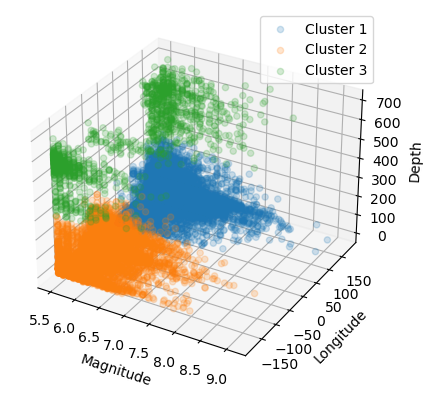

In [42]:
fig = plt.figure()
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D('Magnitude', 'Longitude', 'Depth', data= dfk[kmns.labels_ == 0], alpha= 0.2, label= 'Cluster 1')
ax.scatter3D('Magnitude', 'Longitude', 'Depth', data= dfk[kmns.labels_ == 1], alpha= 0.2, label= 'Cluster 2')
ax.scatter3D('Magnitude', 'Longitude', 'Depth', data= dfk[kmns.labels_ == 2], alpha= 0.2, label= 'Cluster 3')
plt.xlabel('Magnitude')
plt.ylabel('Longitude')
ax.set_zlabel('Depth')
plt.legend();

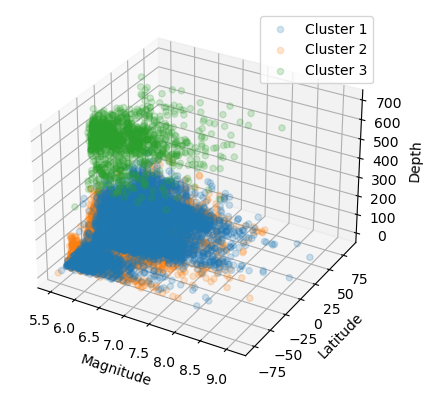

In [43]:
fig = plt.figure()
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D('Magnitude', 'Latitude', 'Depth', data= dfk[kmns.labels_ == 0], alpha= 0.2,  label= 'Cluster 1')
ax.scatter3D('Magnitude', 'Latitude', 'Depth', data= dfk[kmns.labels_ == 1], alpha= 0.2,  label= 'Cluster 2')
ax.scatter3D('Magnitude', 'Latitude', 'Depth', data= dfk[kmns.labels_ == 2], alpha= 0.2,  label= 'Cluster 3')
plt.xlabel('Magnitude')
plt.ylabel('Latitude')
ax.set_zlabel('Depth')
plt.legend();

From the 3D plots above, it appears the features most associated with the division into clusters are Longitude and Depth. We will now plot both features on a 2D scatter plot.

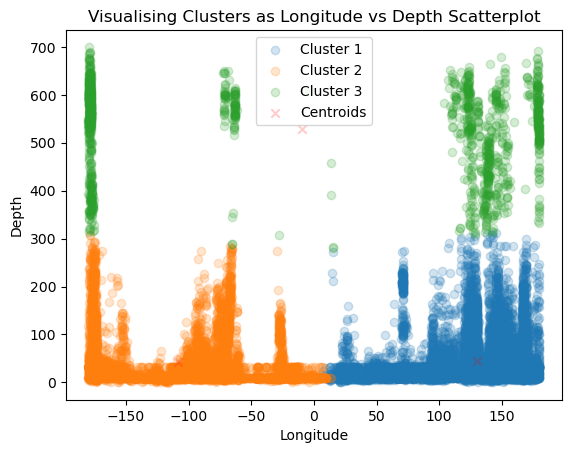

In [44]:
plt.scatter(data= dfk[kmns.labels_ == 0], y= 'Depth', x= 'Longitude', alpha= 0.2, label= 'Cluster 1')
plt.scatter(data= dfk[kmns.labels_ == 1], y= 'Depth', x= 'Longitude', alpha= 0.2, label= 'Cluster 2')
plt.scatter(data= dfk[kmns.labels_ == 2], y= 'Depth', x= 'Longitude', alpha= 0.2, label= 'Cluster 3')
plt.scatter(cents[:,1], cents[:,2], color= 'red', marker= 'x', alpha= 0.2, label = 'Centroids')
plt.xlabel('Longitude')
plt.ylabel('Depth')
plt.title('Visualising Clusters as Longitude vs Depth Scatterplot')
plt.legend();

- Cluster 1 (Blue) - Earthquakes in the eastern hemisphere with depths below 300km
- Cluster 2 (Orange) - Earthquakes in the western hemisphere with depths below 300km
- Cluster 3 (Green) - Earthquakes with depths above 300km wherever the location